# Credit card fraud is when someone uses your credit card or credit account to make a purchase you didn't authorize.

The purpose may be to obtain goods or services, or to make payment to another account which is controlled by a criminal.

In 2018, unauthorised financial fraud losses across payment cards and remote banking totalled £844.8 million in the United Kingdom

Hence, we need to create a model which can detect fraud transactions and help prevent major financial loss

# Steps

First, let's import all require libraries and read the file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve

In [2]:
credit_card_dataset = pd.read_csv("C:/Users/Abhijeet Gupta/Documents/Kaggle/Credit Card Fraud/creditcard.csv")

# Function for variable understanding

In [3]:
def understand_variables(dataset):
    print("Type = " +str(type(dataset))+"\n")
    print("Shape = "+str(dataset.shape)+"\n")
    print("Head : \n\n"+str(dataset.head())+"\n\n")
    print("Columns:\n"+str(dataset.columns)+"\n\n")
    print("No.of unique values :\n\n"+str(dataset.nunique(axis=0))+"\n\n")
    print("Description :\n\n"+str(dataset.describe())+"\n\n")
    
    #print(dataset.describe(exclude=[np.number]))
    #Since no categorical variables, no need to have the above line
    
    print("Null count :\n\n"+str(dataset.isnull().sum()))
    
understand_variables(credit_card_dataset)

Type = <class 'pandas.core.frame.DataFrame'>

Shape = (284807, 31)

Head : 

   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]


Columns:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V1

Variable observations : 

* No missing values. 
* PCA variables seem to be normalized (mean is approx 0 for these)
* Large data set size
* All are numeric values

# Now, lets focus on Feature Engineering #

Time should be converted to hour of the day (24-hr clock), since there's a possibility that fraud transactions may occur more often at certain times of the day (maybe at 3am for example)

In [4]:
credit_card_dataset['Time'] = ((credit_card_dataset['Time']/3600)%24).sort_values(ascending=False)

Next, we attempt to understand individual variable distribution (Checking range, skewness etc..)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


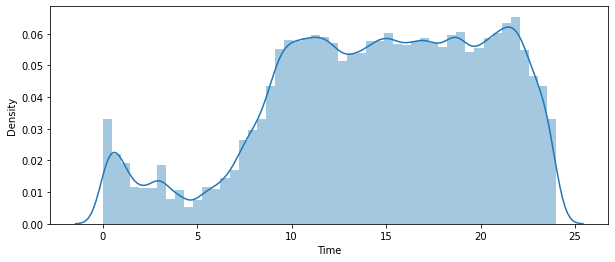

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


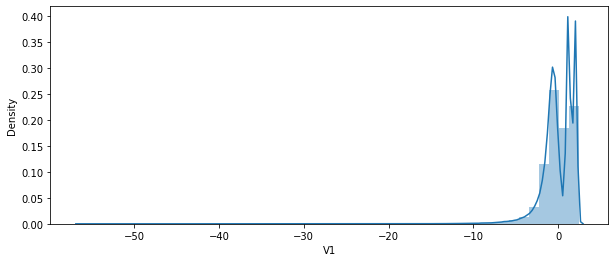

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


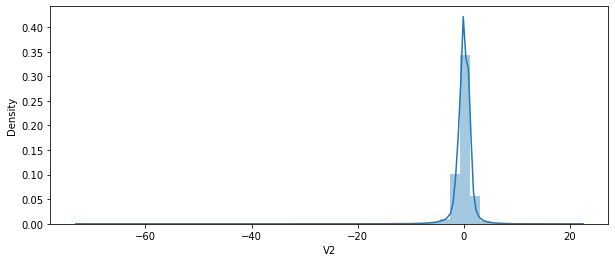

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


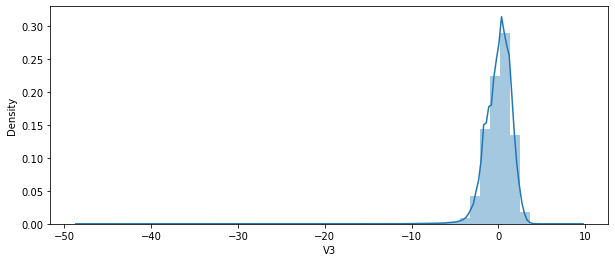

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


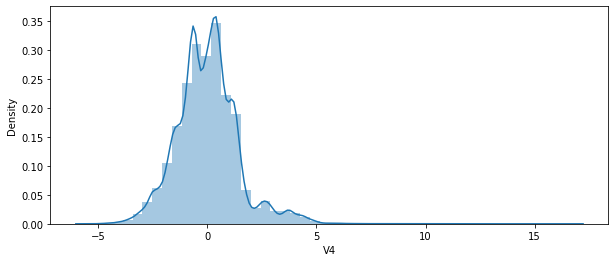

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


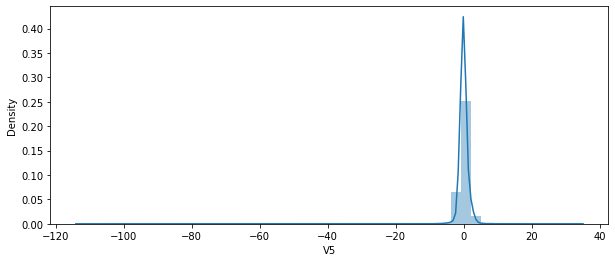

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


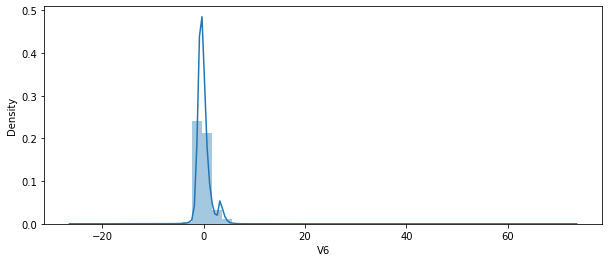

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


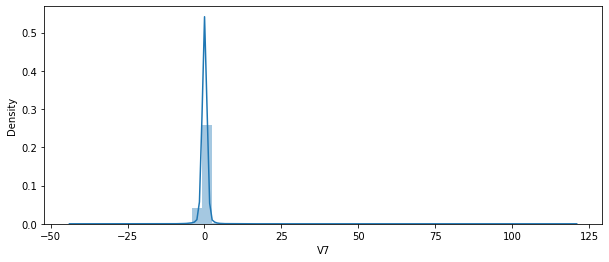

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


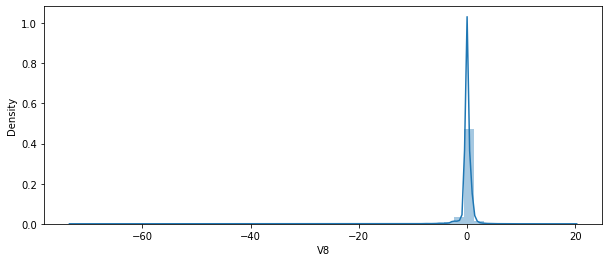

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


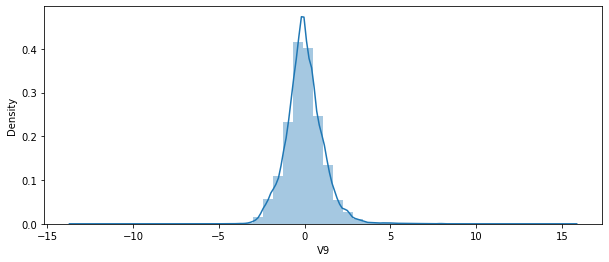

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


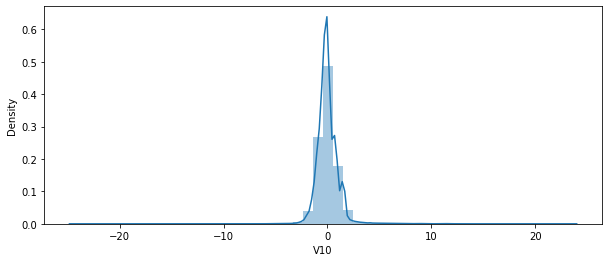

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


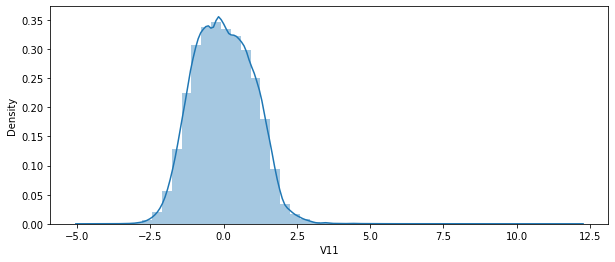

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


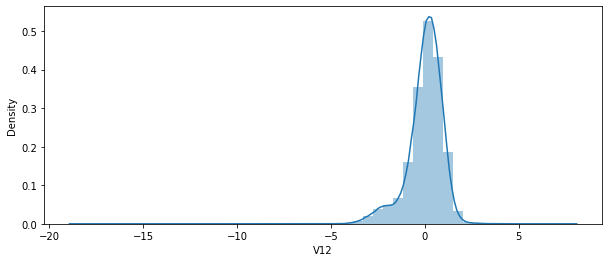

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


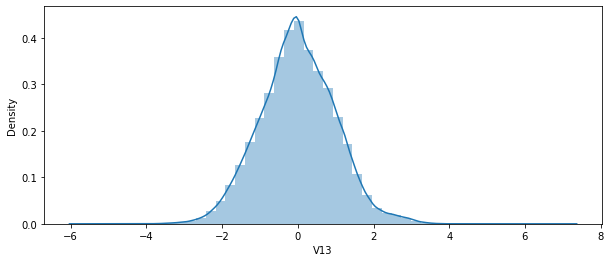

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


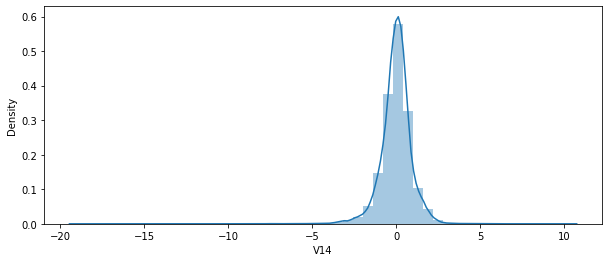

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


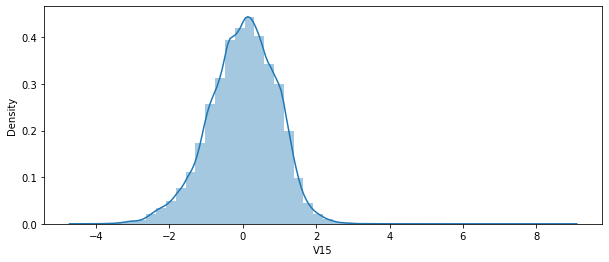

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


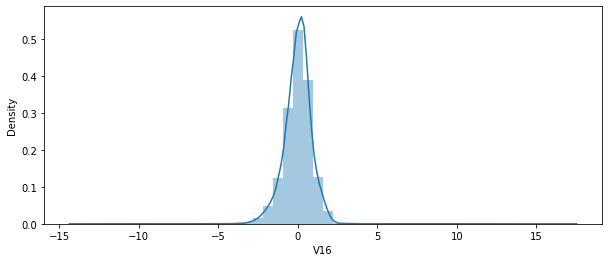

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


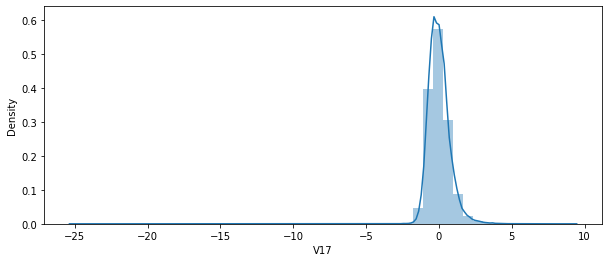

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


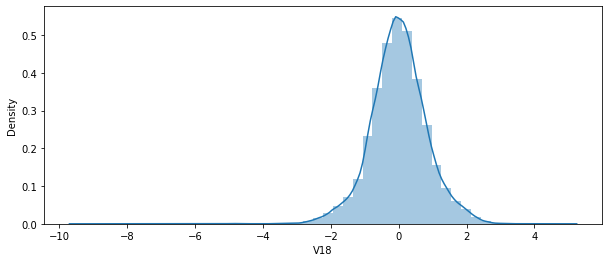

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


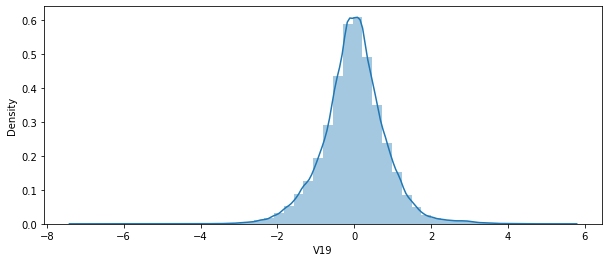

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


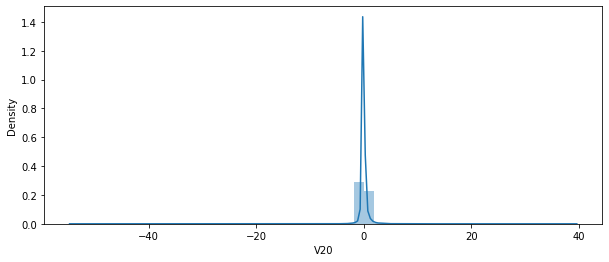

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


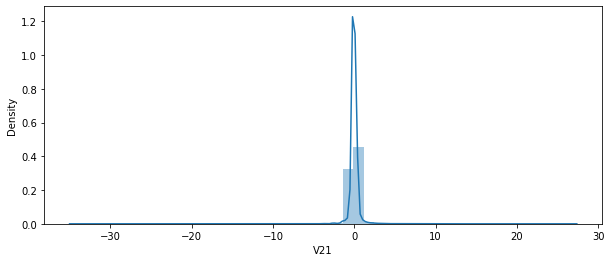

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


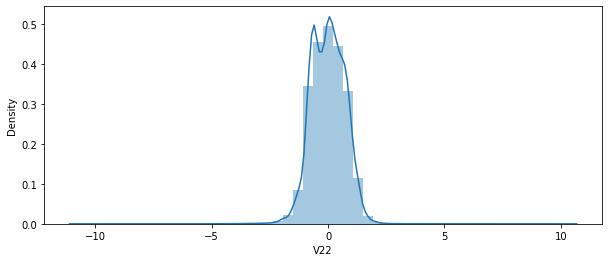

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


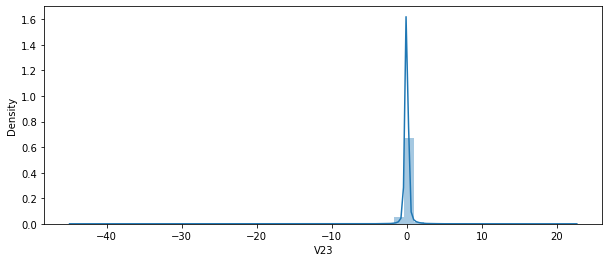

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


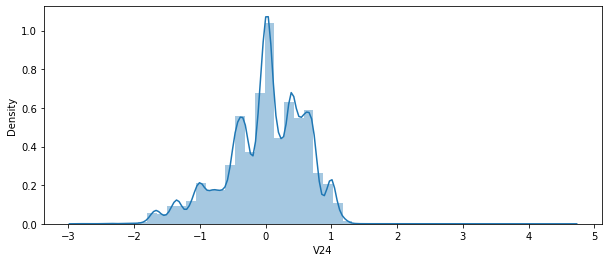

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


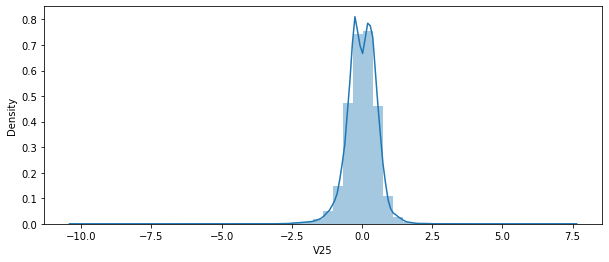

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


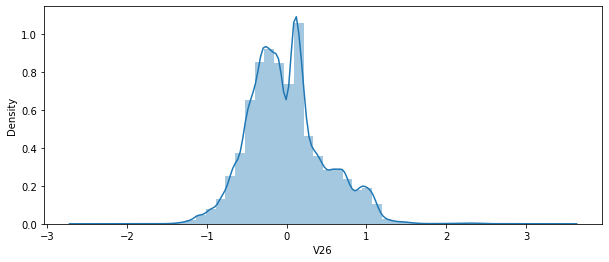

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


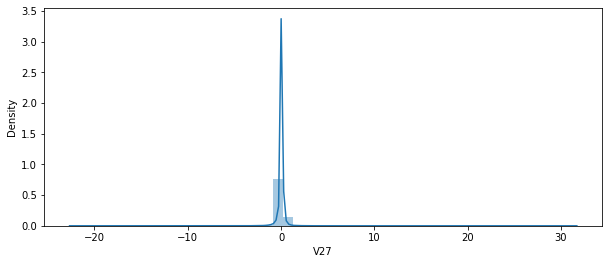

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


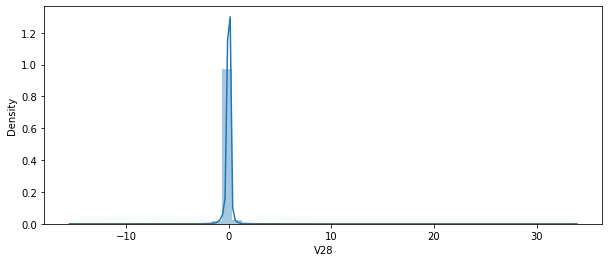

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


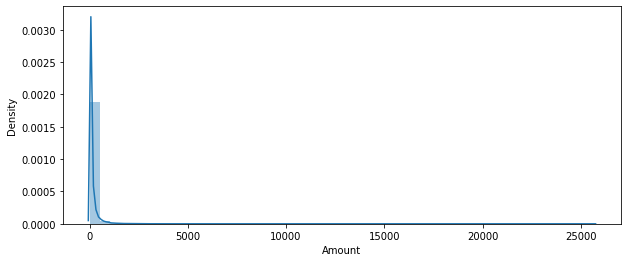

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


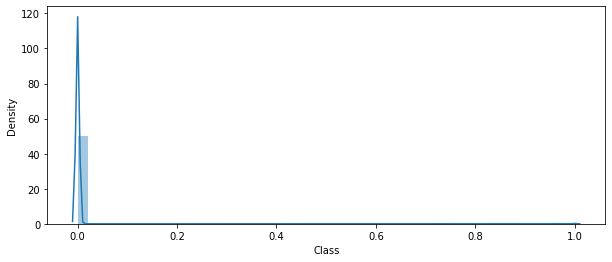

In [5]:
def variable_distribution_analysis(dataset):

        
    numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

    for feature in numerical_features:
        plt.figure(figsize=(10,4))
        try:
            sns.distplot(dataset[feature])
            plt.show()
        except:
            continue


    #sns.pairplot(dataset,kind="reg")
    #plt.show()
    
variable_distribution_analysis(credit_card_dataset)

* Time makes sense (after conversion to hour of the day) since number of transactions are higher between 10am-11pm, compared to 12am-9am. 

* All the PCA variables (V1-V28) are centred at 0, not very skewed, have a lower range and hence seem normalized (as expected of a PCA variable) 

* From amount distribution, we can conclude that most transactions are of less amount (mean = 88 as per understanding_variable function), but there is atleast one instances when amount is around 25,000 (as per understanding_variable max is 25691.16). This distribution aligns with the understanding_variable function output

* The target variable class (last plot) is highly imbalanced

Now, let us check outlier for each variable (hue as class) using Boxplot

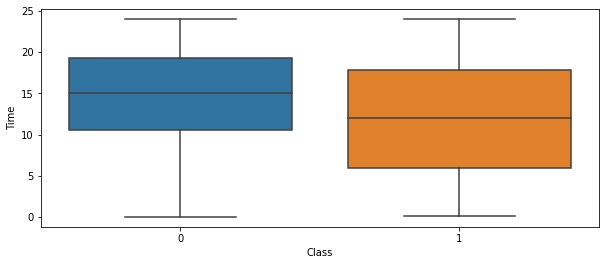

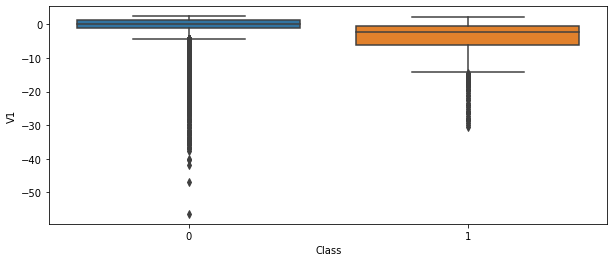

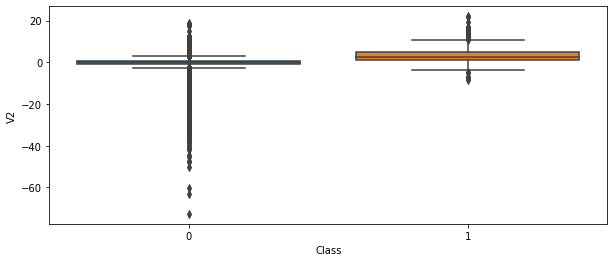

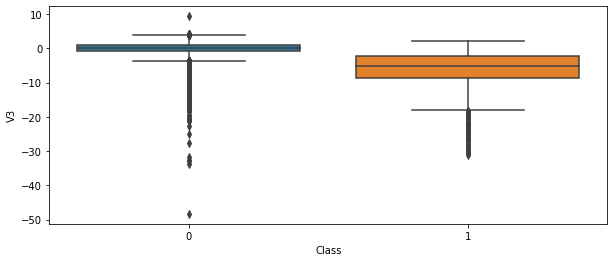

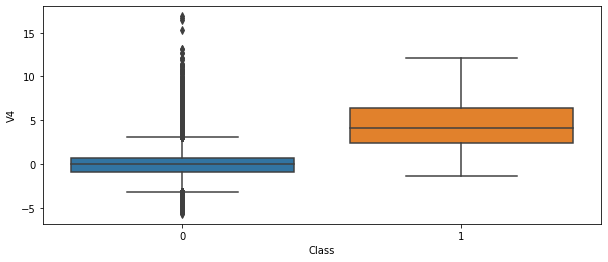

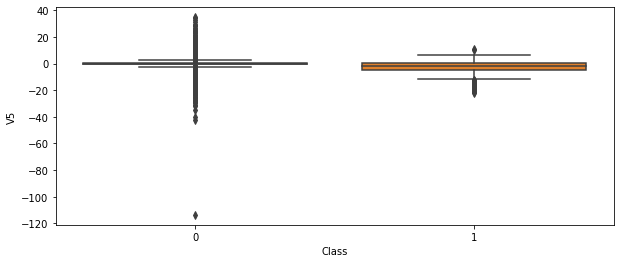

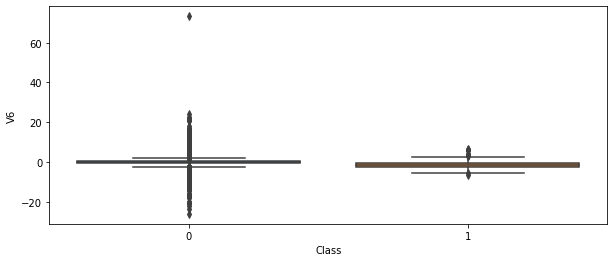

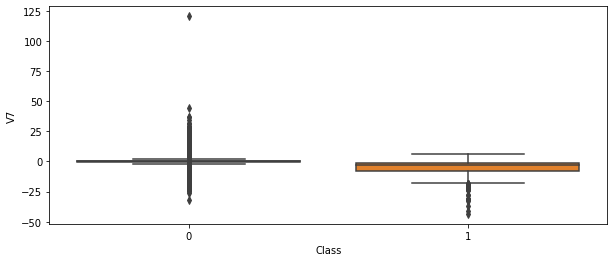

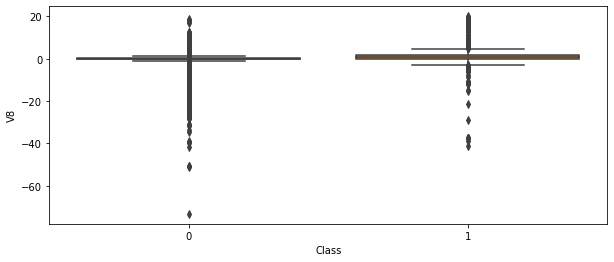

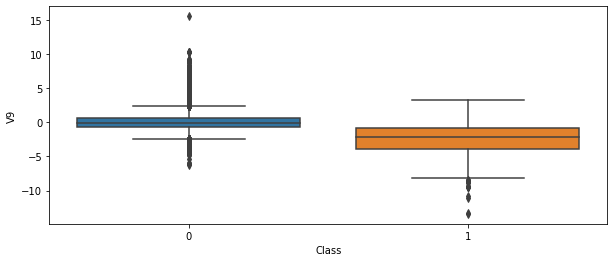

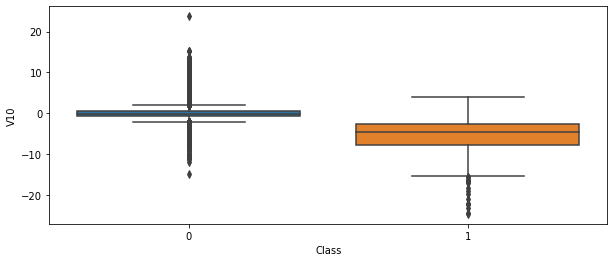

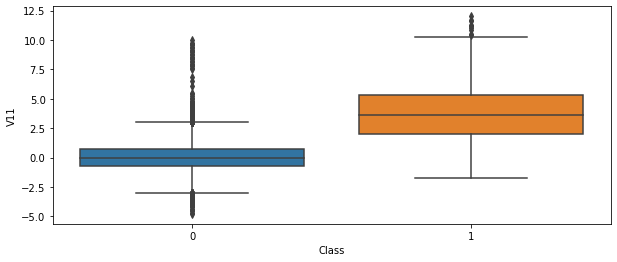

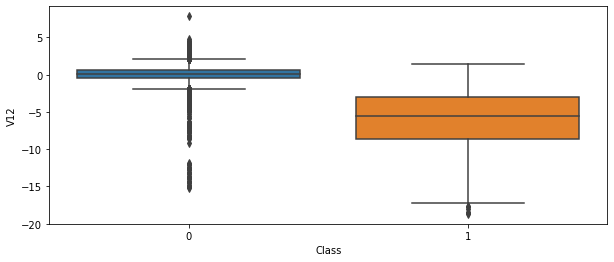

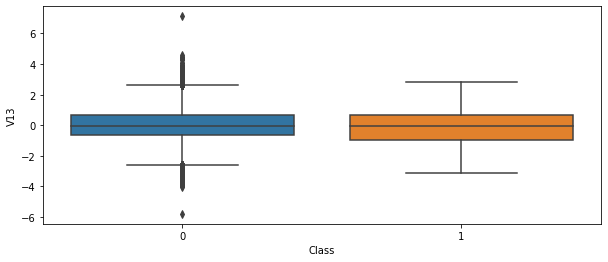

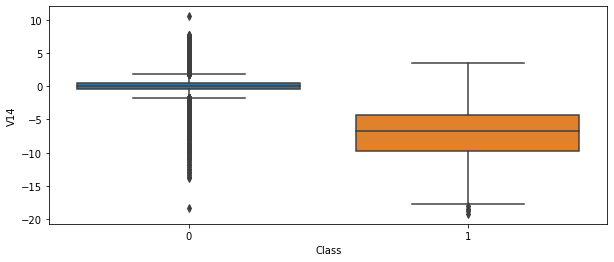

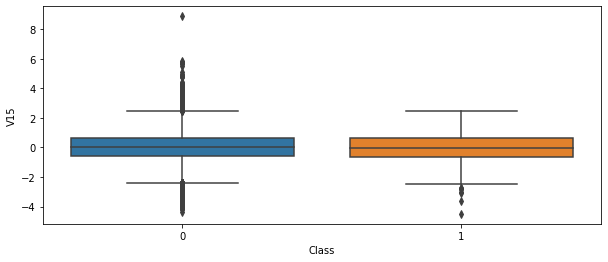

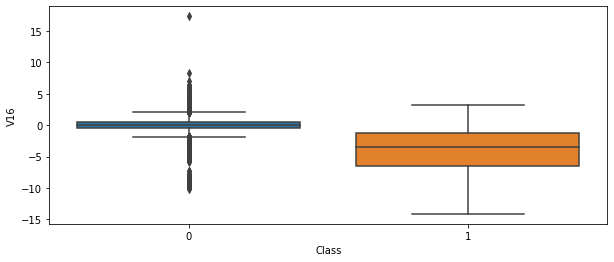

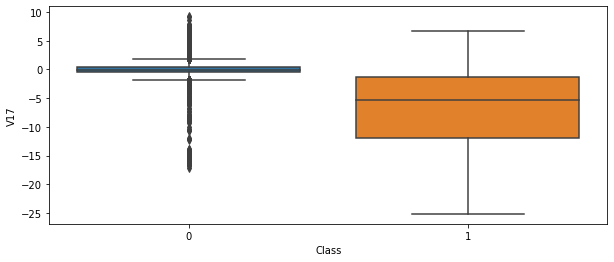

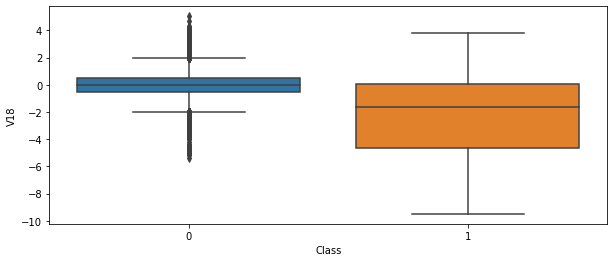

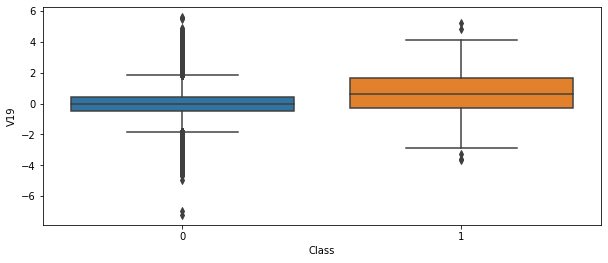

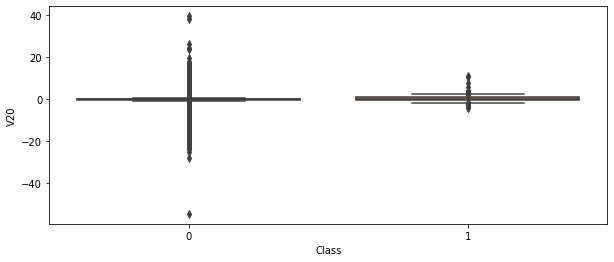

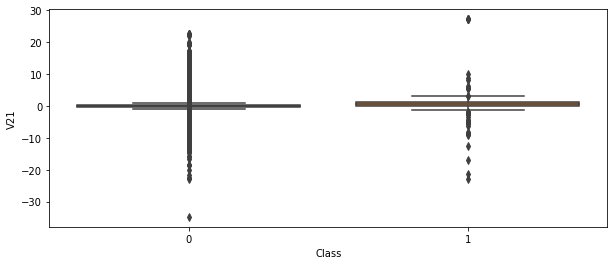

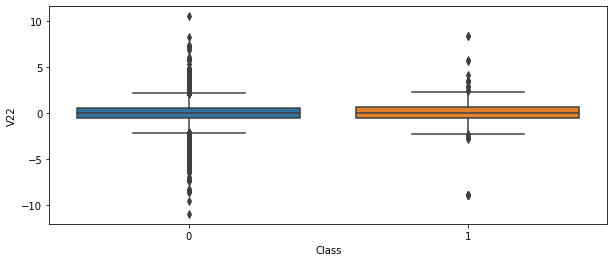

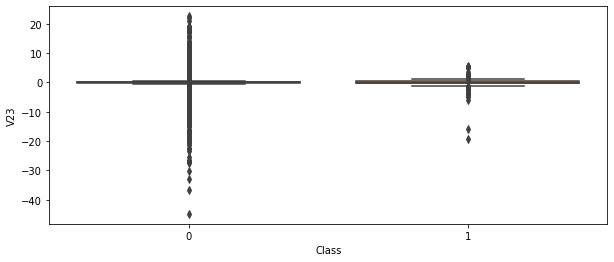

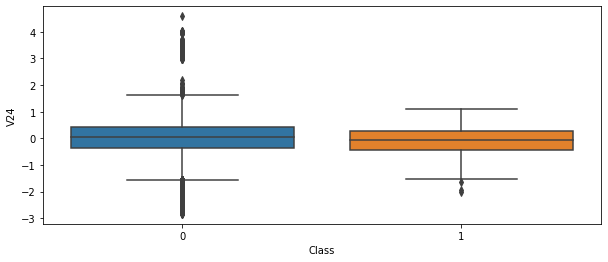

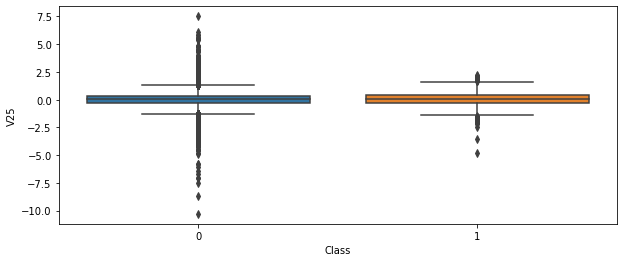

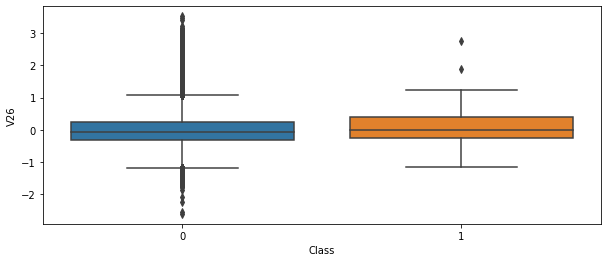

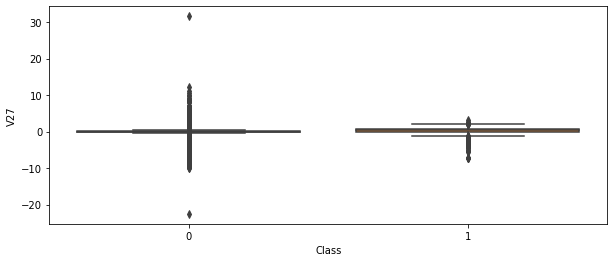

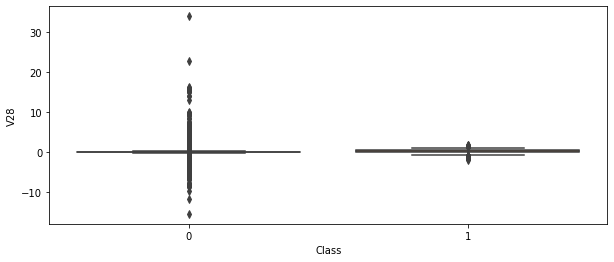

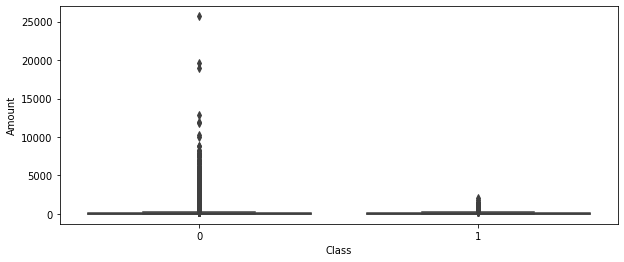

In [6]:
for col in list(credit_card_dataset.columns):
    if col!='Class':
        plt.figure(figsize=(10,4))
        sns.boxplot(data=credit_card_dataset,x='Class',y=col)
        plt.show()

Now, let's do Correlation check

<AxesSubplot:>

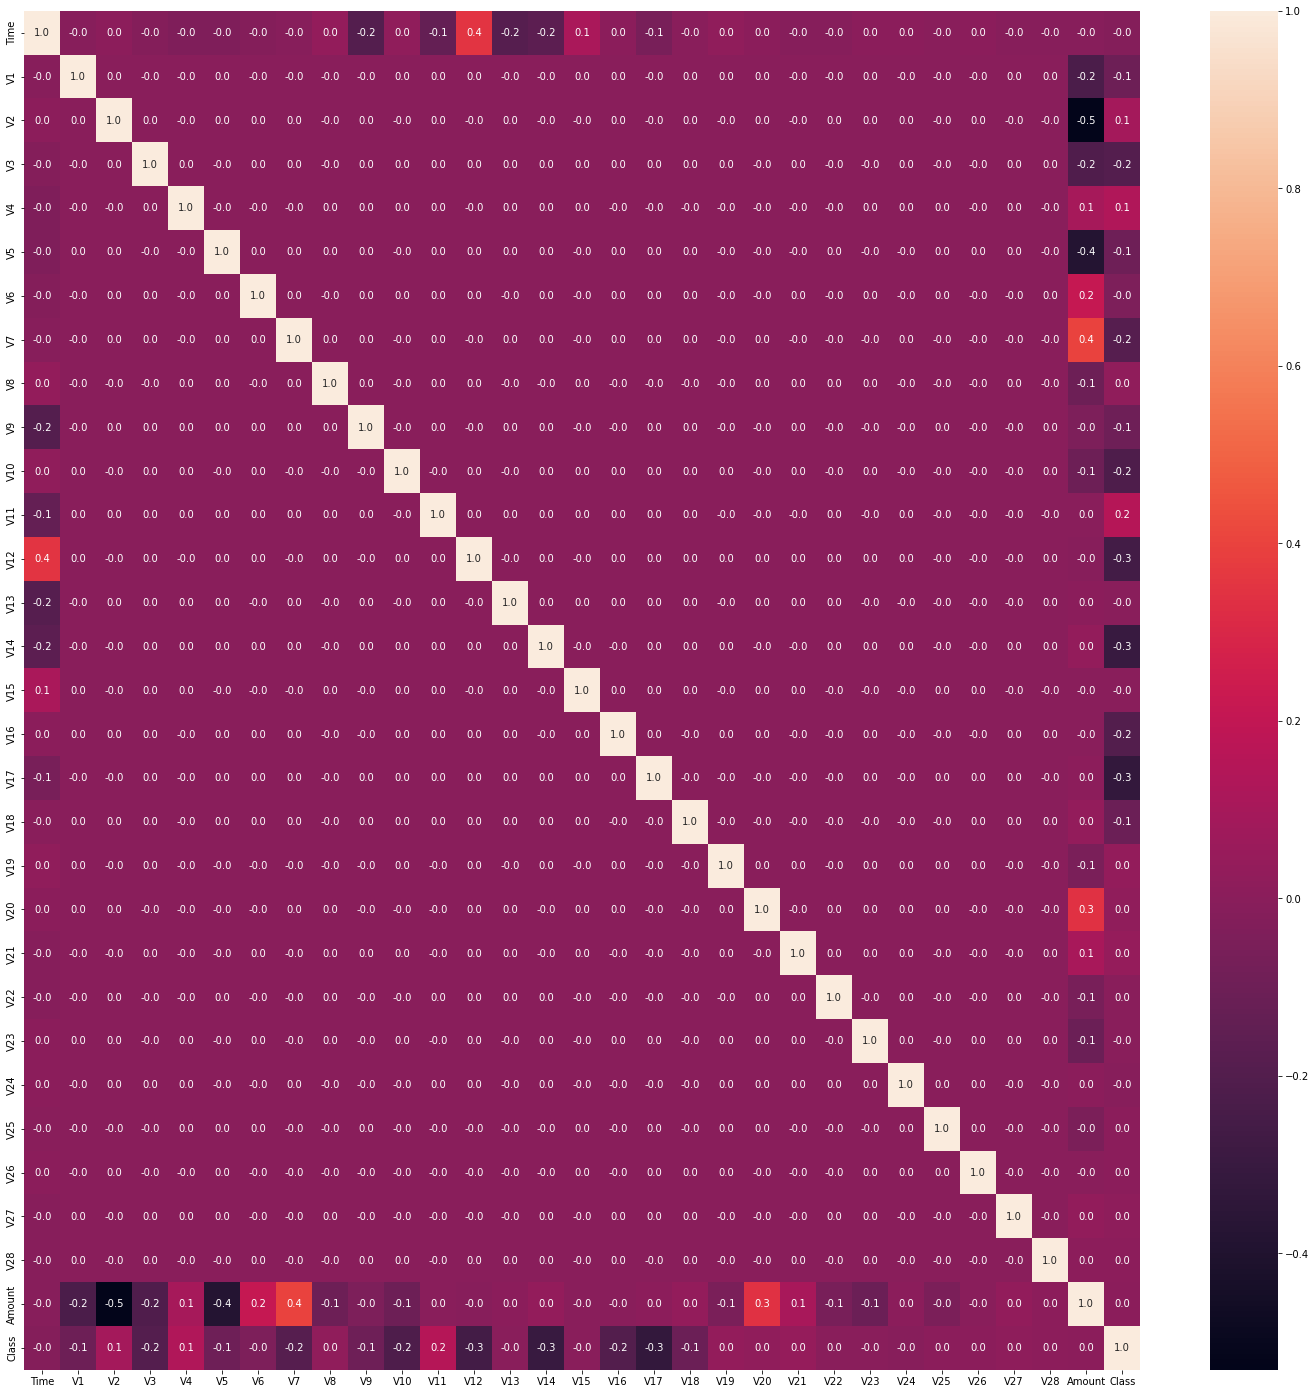

In [7]:
credit_card_corr = credit_card_dataset.corr()
plt.figure(figsize=(25,25))
sns.heatmap(data=credit_card_corr, annot=True,fmt='.1f')

No strong correlations (>0.7 or <-0.7) found for any 2 variables

# Model training and validation

Now, let's use **random forest** to train and test model

Since, we are working with imbalanced dataset, we will set stratify=y in train_test_split. It ensures that both training and testing datasets have same ratio of all label classes (0 and 1 in our case) as the complete imput dataset

Moreover, due to class imbalance, we will use F1-score as measure of performance instead of testing accuracy

In [8]:
X = credit_card_dataset.drop(["Class"],axis=1)
y = credit_card_dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1,stratify=y)
forest_model = RandomForestClassifier(n_estimators=20,random_state=1)
forest_model.fit(X_train, y_train)
Y_pred = pd.Series(forest_model.predict(X_test))

print("Training Accuracy :", forest_model.score(X_train, y_train))
print("Testing Accuracy :", forest_model.score(X_test, Y_pred))

conf = confusion_matrix(y_test, Y_pred)
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, Y_pred)*100,2))+" %")
print("\nClassification report\n\n"+str(classification_report(y_test, Y_pred)))

Training Accuracy : 0.999953184616465
Testing Accuracy : 1.0

Confusion matrix
[[71072     7]
 [   18   105]]

F1 score = 89.36 %

Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.85      0.89       123

    accuracy                           1.00     71202
   macro avg       0.97      0.93      0.95     71202
weighted avg       1.00      1.00      1.00     71202



In [9]:
features = pd.Series(forest_model.feature_importances_)
features.index = X_train.columns
features = features.sort_values(ascending=False)
print("Feature Importance in Random Forest:\n"+ str(features))

Feature Importance in Random Forest:
V12      0.14
V16      0.12
V17      0.12
V14      0.11
V10      0.07
V11      0.07
V9       0.05
V7       0.03
V18      0.02
V21      0.02
V4       0.02
V26      0.02
V6       0.02
V24      0.01
V3       0.01
V27      0.01
V13      0.01
Time     0.01
V20      0.01
V1       0.01
V8       0.01
V19      0.01
V15      0.01
V2       0.01
V25      0.01
Amount   0.01
V22      0.01
V28      0.01
V5       0.01
V23      0.01
dtype: float64


This is good F1-score.

Now, let's check out **xgboost** performance

In [10]:
from sklearn import datasets
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),random_state=1,base_score=0.3)

C:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = credit_card_dataset.drop(["Class"],axis=1)
y = credit_card_dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.245,random_state=1,stratify=y)

xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
#best_preds = np.asarray([np.argmax(line) for line in xgb_y_pred])
conf = confusion_matrix(y_test, xgb_y_pred)
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, xgb_y_pred)*100,2))+" %")
print(classification_report(y_test, xgb_y_pred))

In [ ]:
f = 'gain'
x = xgb_model.get_booster().get_score(importance_type= f)

print("Feature importance for xgboost model : \n")
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

xgboost has better f1 score than random forest. In xgboost, precision may be lower, but recall is much higher than random forest. 

**Recall is more important than precision in case of credit card fraud detection.**

**This is because it is acceptable to an extent that a non-fraud transaction is labelled as fraud (can be resolved by calling up and asking for additional details from the customer/bank).**

**However, it is dangerous to label a fraud as non-fraud (in such scenario, a fraud transaction will go ahead without any checks)**

# Now, let us create Precision-Recall Curve to get the ideal probablity threshold for positive classification.

The trade-off which we must do is that False Negative (Labelling fraud as non-fraud) should decrease at the expense of increasing False Positive (Labelling non-fraud as fraud) to some extent

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
## Get predcition probabilities (range of 0 to 1) instead of binary values (0/1)
xgb_y_pred_prob = xgb_model.predict_proba(X_test)

In [ ]:
y_pred_prob_df = pd.DataFrame(xgb_y_pred_prob)[[1]]
print(y_pred_prob_df.sort_values(by=[1],ascending=False).head(118)) # 117 predicted as fraud, and last probability in the list (index = 44160) is for a class predicted as non-fraud

#This verifies the fact that probablity threshold is 0.5. We can look at how recall changes with change in probablity threshold

xgb_y_pred_prob = pd.DataFrame(xgb_y_pred_prob)

In [ ]:
import sklearn
auprc = sklearn.metrics.average_precision_score(y_test, xgb_y_pred)
print(auprc)

In [ ]:
xgb_precision, xgb_recall,threshold = precision_recall_curve(y_test, y_pred_prob_df)
xgb_f1, xgb_auc = f1_score(y_test, xgb_y_pred), auc(xgb_recall, xgb_precision)

In [ ]:
print(xgb_f1)
print(xgb_auc)

In [ ]:
#threshold = np.append(threshold,[1])
precision_recall_threshold_df = pd.DataFrame([xgb_precision, xgb_recall,threshold]).transpose()
precision_recall_threshold_df.columns = ['Precision','Recall','Threshold']
precision_recall_threshold_df['F1-Score'] = 2*precision_recall_threshold_df['Precision']*precision_recall_threshold_df['Recall']/(precision_recall_threshold_df['Precision']+precision_recall_threshold_df['Recall'])
print(precision_recall_threshold_df)

In [ ]:
plt.figure(figsize=(20,4))
sns.lineplot(x="Recall", y="Precision", data=precision_recall_threshold_df)
plt.show()

In [ ]:
plt.figure(figsize=(20,4))
sns.lineplot(x="Threshold", y="F1-Score", data=precision_recall_threshold_df)
plt.show()

## We look at thresholds where Precision is >=0.85 and Recall >= 0.9

print(precision_recall_threshold_df[(precision_recall_threshold_df['Precision']>=0.85) & (precision_recall_threshold_df['Recall']>=0.9)].sort_values(by='Recall',ascending=False))

##Then, after the threshold observations, we select threshold with highest f1-score (since increasing recall will decrease precision drastically)
max_f1_threshold = (precision_recall_threshold_df[precision_recall_threshold_df["F1-Score"]==max(precision_recall_threshold_df["F1-Score"])]["Threshold"]).iloc[0]

In [ ]:
## Classify as fraud for probability greater than max_f1_threshold (~0.33)

y_pred_prob_df.columns = ['Prob of 1']
y_pred_prob_df['class'] = [1 if float(prob)>=max_f1_threshold else 0 for prob in y_pred_prob_df['Prob of 1']]

In [ ]:
conf = confusion_matrix(y_test, y_pred_prob_df['class'])
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, y_pred_prob_df['class'])*100,2))+" %")
print(classification_report(y_test, y_pred_prob_df['class']))

We observe that using a threshold of 0.33 increases recall from 0.89 to 0.92, which precsion hasn't changed significantly (remains 0.92)

Hence, we will use this threshold for our model

# Finally, we obtain a credit card fraud detection model which predicts fraud transactions with precision of 92% and recall of 92%

Feel free to comment below wtth your thoughts, suggestions, feedback, improvements